<a href="https://colab.research.google.com/github/Alepescinaa/ScientificTools/blob/main/Project1/Cp1/checkpoint1_submission4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [2]:
!git clone https://github.com/Alepescinaa/ScientificTools
%cd ScientificTools/Project1/Cp1

Cloning into 'ScientificTools'...
remote: Enumerating objects: 1621, done.
remote: Counting objects: 100% (601/601), done.
remote: Compressing objects: 100% (375/375), done.
remote: Total 1621 (delta 325), reused 408 (delta 200), pack-reused 1020
Receiving objects: 100% (1621/1621), 361.48 MiB | 20.95 MiB/s, done.
Resolving deltas: 100% (649/649), done.
Updating files: 100% (597/597), done.
/content/ScientificTools/Project1/Cp1


In [3]:
# loading of the dataset
CP1data = np.load("CP1data.npz")
CP1data = CP1data['arr_0']

In [6]:
from scipy.interpolate import RBFInterpolator

def checkpoint1_solution_radial1(x, y, t, X, Y, s_value=0.1, s_aniso_1=0.5, s_aniso_2=0.5):
    coordinates = np.column_stack((x, y))

    mesh_coordinates=np.column_stack((X.ravel(), Y.ravel()))

    s = [s_value,s_value,s_value,s_value,s_value,s_value,s_value,s_value,s_value,s_value,s_aniso_1, s_value,s_value,s_value,s_value, s_aniso_2,s_value,s_value,s_value,s_value]

    rbf = RBFInterpolator(coordinates, t, neighbors=None, smoothing=s, kernel='thin_plate_spline', epsilon=None, degree=1)

    time_pred = rbf(mesh_coordinates)
    time_pred=time_pred.reshape(1501,1501)

    source_indices = np.where(time_pred < 1e-2)

    indices_2d_m = np.array(source_indices).T


    grad_x, grad_y = np.gradient(time_pred)

    vel_pred = 1.0/( np.sqrt((grad_x/(3.0/1500))**2+(grad_y/(3.0/1500))**2) + 1e-4)
    vel_pred[indices_2d_m[:, 0],indices_2d_m[:, 1]] = 1.0/( np.sqrt((grad_x[indices_2d_m[:, 0],indices_2d_m[:, 1]]/(3.0/1500))**2+(grad_y[indices_2d_m[:, 0],indices_2d_m[:, 1]]/(3.0/1500))**2) + 1e-3)


    return time_pred, vel_pred

In [15]:
ind_disp = 5
x_meas = CP1data[ind_disp][0]
y_meas = CP1data[ind_disp][1]
t_meas = CP1data[ind_disp][2]

X, Y = np.meshgrid(np.linspace(-1.5,1.5,1501), np.linspace(-1.5,1.5,1501))

time_pred,vel_pred = checkpoint1_solution_radial1(x_meas, y_meas, t_meas, X, Y)

In [16]:
#need to swap the rows of the matrix of times if we want to use imshow matching the values of the time with the right (X,Y)
num_rows = time_pred.shape[0]
for i in range(num_rows // 2):
    time_pred[i], time_pred[num_rows - 1 - i] = time_pred[num_rows - 1 - i], time_pred[i].copy()

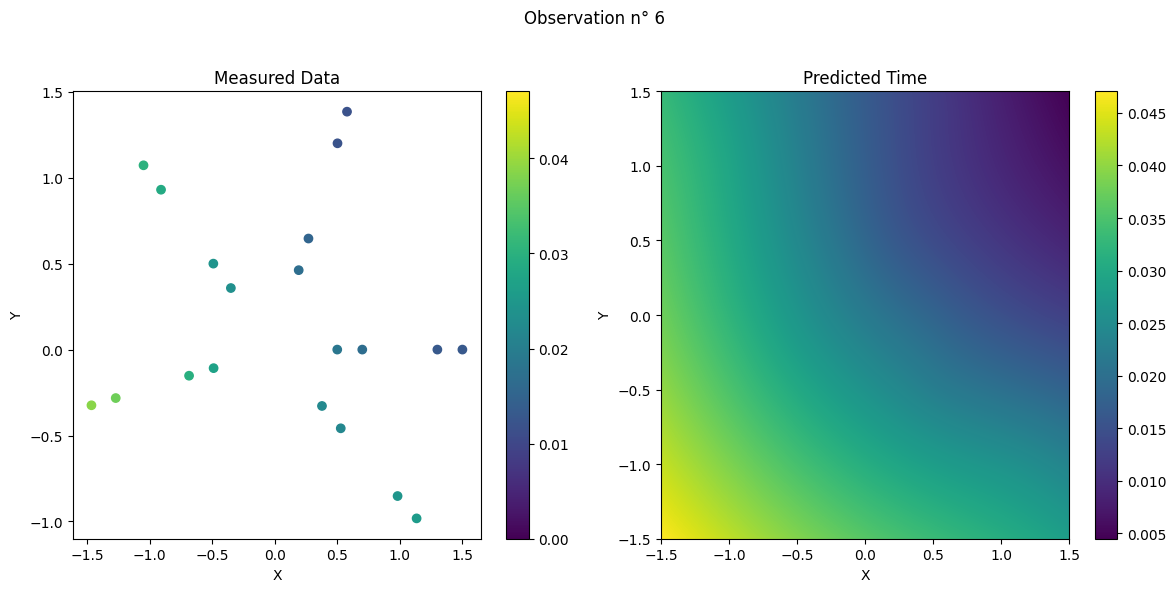

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot with measured data
sc = ax[0].scatter(x_meas, y_meas, c=t_meas, vmin=0, vmax=np.max(time_pred))
ax[0].set_title('Measured Data')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
plt.colorbar(sc, ax=ax[0])

# Image plot with predicted time data
im = ax[1].imshow(time_pred, extent=[np.min(X), np.max(X), np.min(Y), np.max(Y)], origin='lower', aspect='auto')
ax[1].set_title('Predicted Time')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
plt.colorbar(im, ax=ax[1])

# Set the title for the entire figure
plt.suptitle(f'Observation n° {ind_disp + 1}')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make space for the suptitle
plt.show()

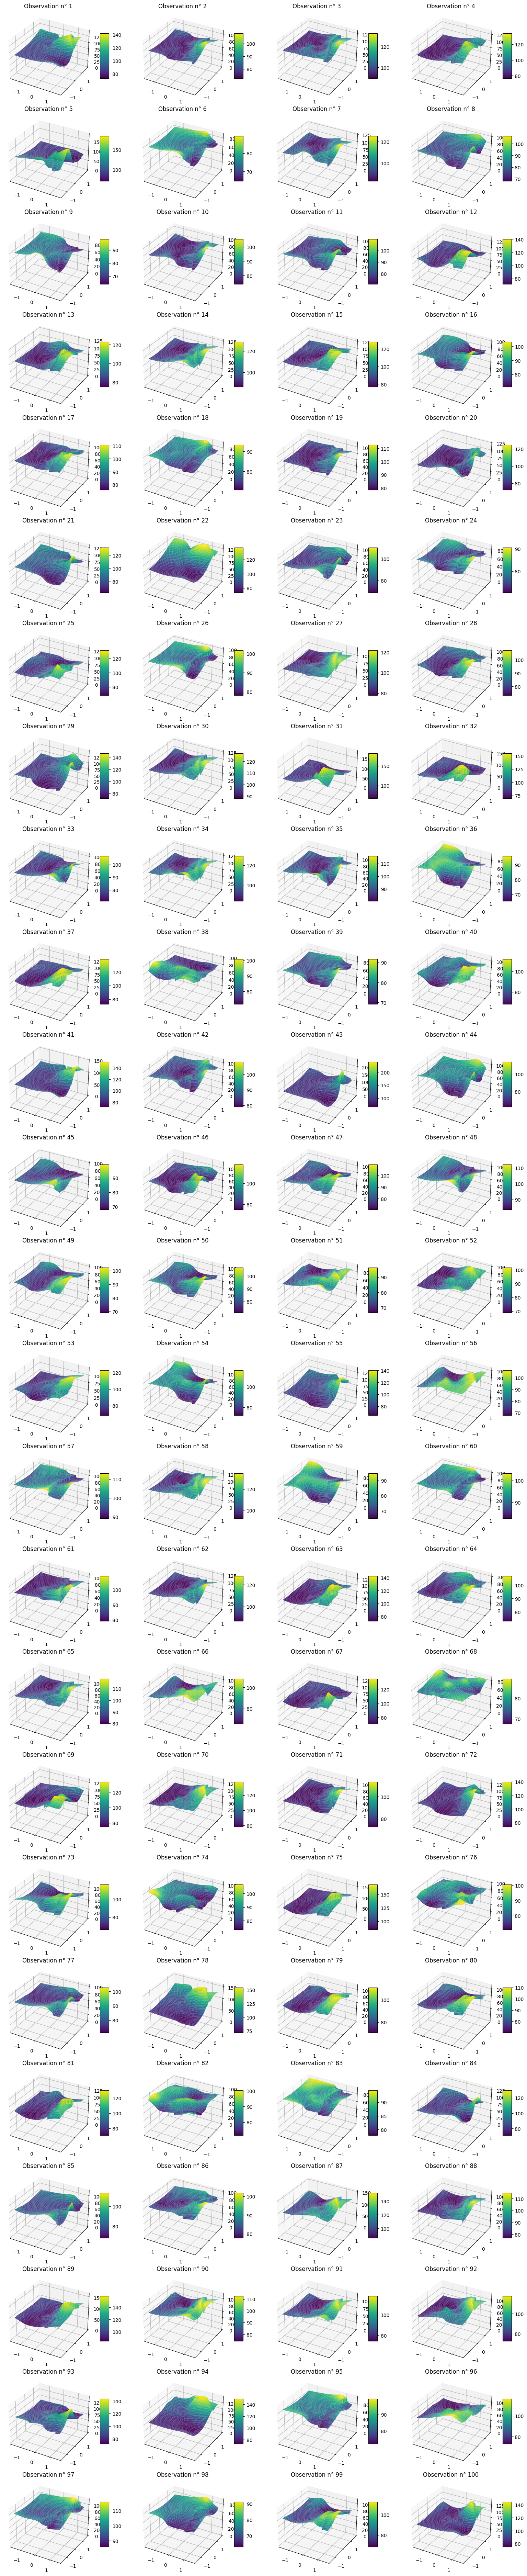

In [23]:
fig, ax = plt.subplots(25, 4, subplot_kw={"projection": "3d"}, figsize=(16, 75))
ax = ax.flatten()

for i in range(100):
    x_meas = CP1data[i][0]
    y_meas = CP1data[i][1]
    t_meas = CP1data[i][2]

    time_pred, vel_pred = checkpoint1_solution_radial1(x_meas, y_meas, t_meas, X, Y)

    surf = ax[i].plot_surface(X, Y, vel_pred, cmap='viridis')
    ax[i].set_zlim(bottom=0, top=np.max(vel_pred))
    fig.colorbar(surf, ax=ax[i], shrink=0.5, aspect=5)
    ax[i].set_title(f'Observation n° {i + 1}')

plt.tight_layout()
plt.show()